In [2]:
import pandas as pd
from sklearn import linear_model
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('../data/polo_data.csv',sep=';')
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
print(len(df))
df.head()

795


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,144900,2016,81000,2016-12-15,Benzin,23.8,95,A,2500
1,14900,2000,181000,2000-02-25,Benzin,17.4,50,M,4600
2,109900,2015,105000,2015-05-07,Benzin,24.4,95,M,7173
3,269900,2018,36000,2018-09-12,Benzin,16.9,200,A,8700
4,259900,2019,39000,2019-04-30,Benzin,21.6,150,A,5200


<h2> Geographical

In [48]:
df['east']= df['zip_code'] < 4999
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code,east
0,144900,2016,81000,2016-12-15,Benzin,23.8,95,A,2500,True
1,14900,2000,181000,2000-02-25,Benzin,17.4,50,M,4600,True
2,109900,2015,105000,2015-05-07,Benzin,24.4,95,M,7173,False
3,269900,2018,36000,2018-09-12,Benzin,16.9,200,A,8700,False
4,259900,2019,39000,2019-04-30,Benzin,21.6,150,A,5200,False
...,...,...,...,...,...,...,...,...,...,...
790,189900,2018,88000,2018-05-30,Benzin,21.3,115,A,6500,False
791,249900,2019,27000,2019-07-10,Benzin,18.0,200,A,6270,False
792,192000,2016,42000,2015-11-01,Benzin,21.3,150,A,5700,False
793,73500,2010,161000,2010-11-01,Diesel,29.4,75,M,2100,True


In [49]:
east = (df['east'] == True)
west = (df['east'] == False)

east_price = df[east]['price']
west_price = df[west]['price']

print(sum(east_price)/len(east_price))
print(sum(west_price)/len(west_price))

172118.1853035144
168465.36307053943


<BarContainer object of 2 artists>

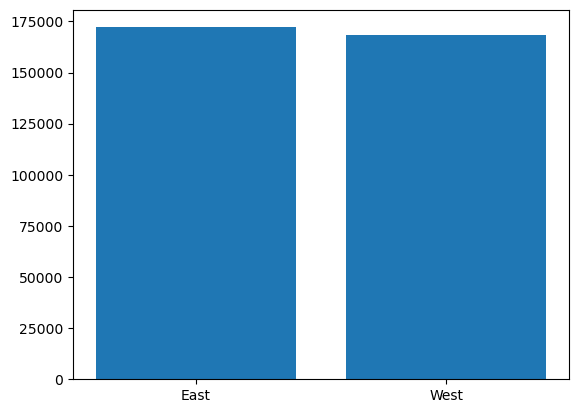

In [50]:
regions = ['East','West']
avg_prices = [
    sum(east_price)/len(east_price),
    sum(west_price)/len(west_price)
]


plt.bar(regions,avg_prices)